# 🚑Predicting Heart Disease using Machine Learning💖

## 🔧Preparing the tools

In [10]:
# Import all the tools

# Regular EDA (Exploratory Data Analysis) and plotting libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## 📇Load Data

In [11]:
df = pd.read_csv("data/heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## 🔎Data Exploration (Exploratory Data Analysis - EDA)

In [12]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [13]:
# Let's find out how many of each class there
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

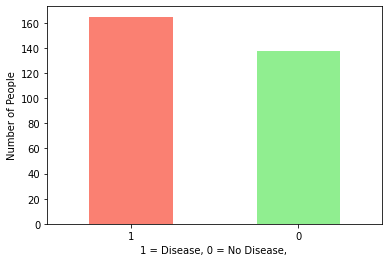

In [14]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightgreen"]);
plt.xlabel("1 = Disease, 0 = No Disease, ")
plt.ylabel("Number of People")
plt.xticks(rotation=0);

In [15]:
# Types of data and number of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [16]:
# Are there any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [17]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to Sex

> * 1 = male
> * 0 = female

In [18]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [19]:
# Compare target column to sex column
pd.crosstab(df["target"], df["sex"])

sex,0,1
target,,
0,24,114
1,72,93


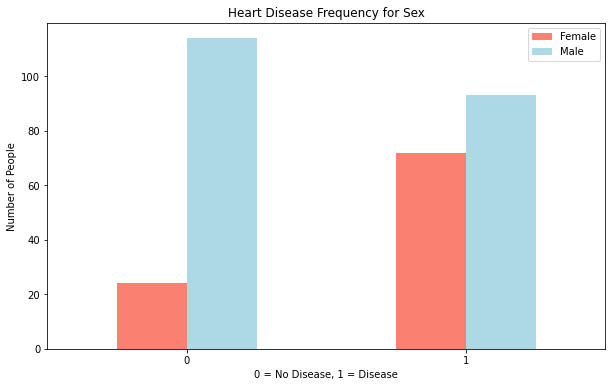

In [20]:
# Create a plot of crosstab
pd.crosstab(df["target"], df["sex"]).plot(kind="bar", color=["salmon", "lightblue"], figsize=(10, 6))

# Helpful info
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Number of People")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

### Age vs. Max Heart Rate for Heart Disease
> * age : age in years
> * thalach : maximum heart rate achieved

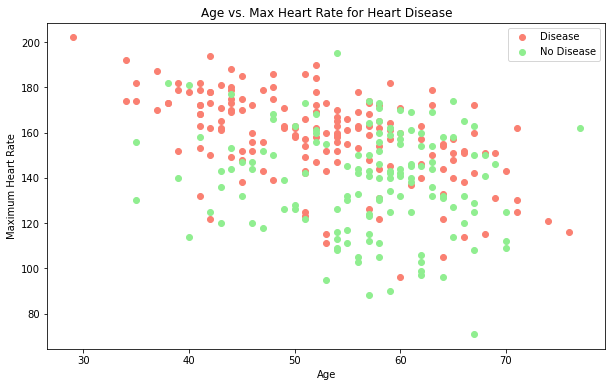

In [21]:
# Create figure
plt.figure(figsize=(10, 6))

# Scatter with positive examples
plt.scatter(x=df["age"][df["target"]==1], 
            y=df["thalach"][df["target"]==1], 
            c="salmon")

# Scatter with negative examples
plt.scatter(x=df["age"][df["target"]==0], 
            y=df["thalach"][df["target"]==0], 
            c="lightgreen")

# Helpful info
plt.title("Age vs. Max Heart Rate for Heart Disease")
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.legend(["Disease", "No Disease"]);

### Distribution of the age column with a histogram

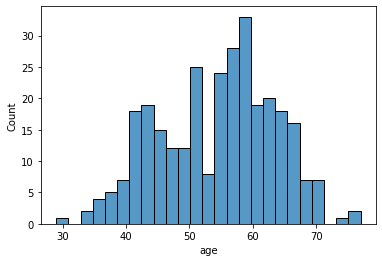

In [22]:
sns.histplot(df["age"], bins=25);

### Heart Disease Frequency according to Chest Pain

cp - chest pain type
> * 0: Typical angina: chest pain related decrease blood supply to the heart
>* 1: Atypical angina: chest pain not related to heart
>* 2: Non-anginal pain: typically esophageal spasms (non heart related)
>* 3: Asymptomatic: chest pain not showing signs of disease

In [23]:
df["cp"].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [24]:
pd.crosstab(df["target"], df["cp"])

cp,0,1,2,3
target,,,,
0,104,9,18,7
1,39,41,69,16


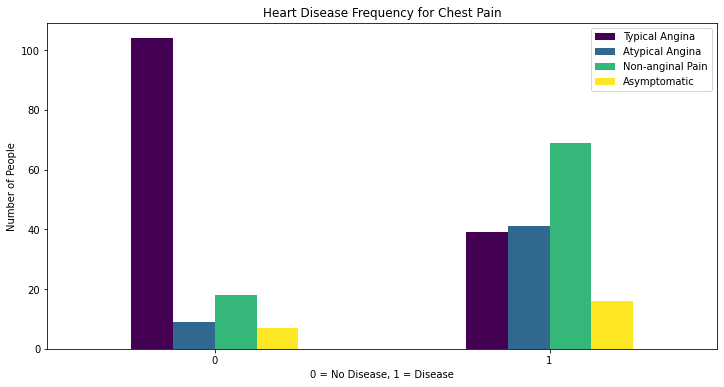

In [25]:
# Create a plot of crosstab
pd.crosstab(df["target"], df["cp"]).plot(kind="bar", cmap="viridis", figsize=(12, 6))

# Helpful info
plt.title("Heart Disease Frequency for Chest Pain")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Number of People")
plt.legend(["Typical Angina", "Atypical Angina", "Non-anginal Pain", "Asymptomatic"])
plt.xticks(rotation=0);

In [26]:
pd.crosstab(df["cp"], df["target"])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


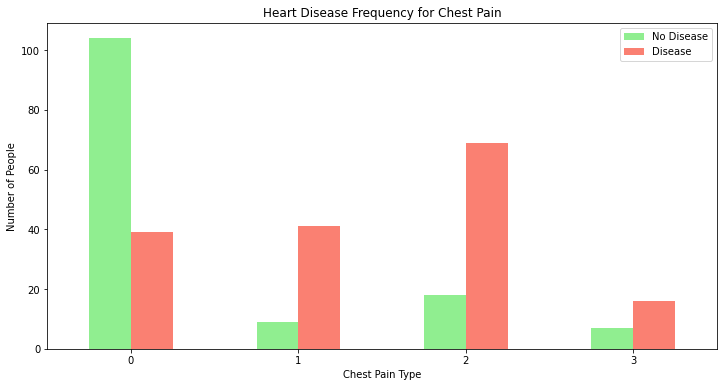

In [27]:
# Create a plot of crosstab
pd.crosstab(df["cp"], df["target"]).plot(kind="bar", color=["lightgreen", "salmon"], figsize=(12, 6))

# Helpful info
plt.title("Heart Disease Frequency for Chest Pain")
plt.xlabel("Chest Pain Type")
plt.ylabel("Number of People")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

### Correlation Matrix
> * Positive correlation value = Directly proportional with each other
> * Negative correlation value = Inversely proportional with each other

In [28]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


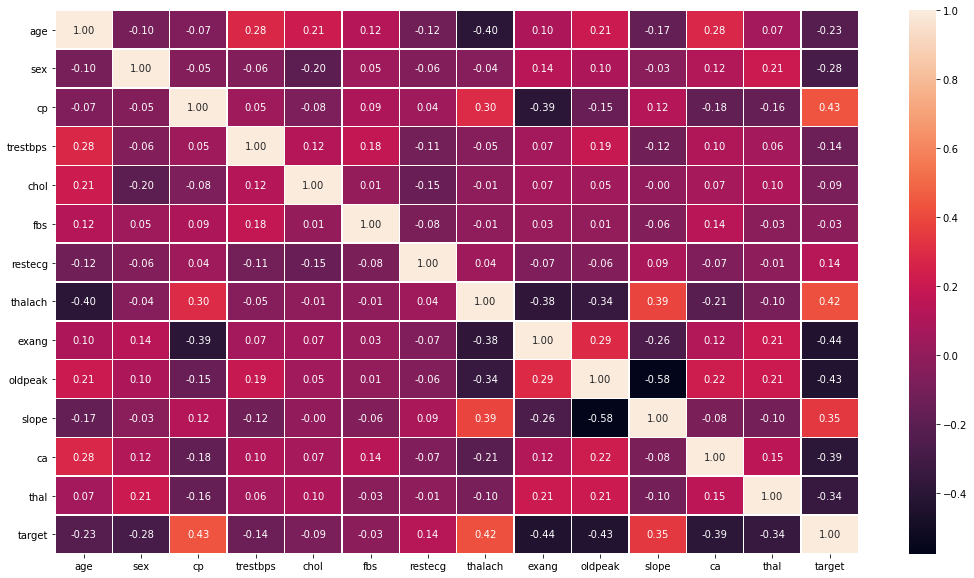

In [29]:
# Visualize Correlation Matrix with Seaborn's Heatmap
corr_mat = df.corr()
fig, ax = plt.subplots(figsize=(18, 10))
ax = sns.heatmap(corr_mat, 
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f");

## 📐Modelling

We're going to try 3 different machine learning models:
> 1. Logistics Regression
2. K-Nearest Neighbors Classifier
3. Random Forest Classifier

In [30]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [31]:
np.random.seed(42)

# Split data into features (X) and label (y)
X = df.drop("target", axis=1)
y = df["target"]

# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [32]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "K-Nearest Neighbors": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models.
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : testing labels
    """
    # Dictionay to keep model scores
    model_scores = {}
    
    # Loop through models
    for name, model in models.items():
        
        # Fit the model to the data
        model.fit(X_train, y_train)
        
        # Evaluate the model and append its scores to model_scores
        model_scores[name] = model.score(X_test, y_test)
    
    return model_scores

In [33]:
model_scores = fit_and_score(models=models, 
                             X_train=X_train, 
                             X_test=X_test, 
                             y_train=y_train, 
                             y_test=y_test)

model_scores

C:\Users\Madhur Palohiya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'K-Nearest Neighbors': 0.6885245901639344,
 'Random Forest': 0.8524590163934426}

### Model Comparison

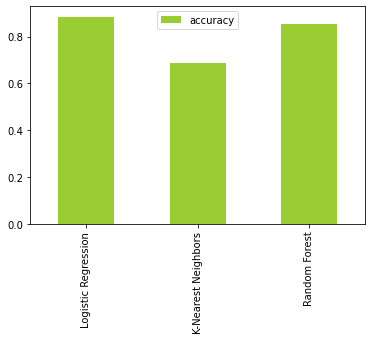

In [34]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot(kind="bar", color=["yellowgreen"]);

## 🧪Experimentation

### Hyperparameter Tuning (by hand)

##### Let's tune K-Nearest Neighbors (Elbow Method)

In [35]:
# List of error rate for different n_neighbors values
error_rate = []

# Scores
test_scores = []
train_score = []

# Create a list of different values of n_neighbors
neighbors = range(1, 21)

# Set K-Nearest Neighbors instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm and get the predictions
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    
    # Get test and train score for different n_neighbors values
    train_score.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))
    
    # Get the error rate
    error_rate.append(np.mean(pred_i != y_test))

Maximum KNN score on test data: 75.41%
Best n_neighbors value: 11
Minimum error rate: 0.2459


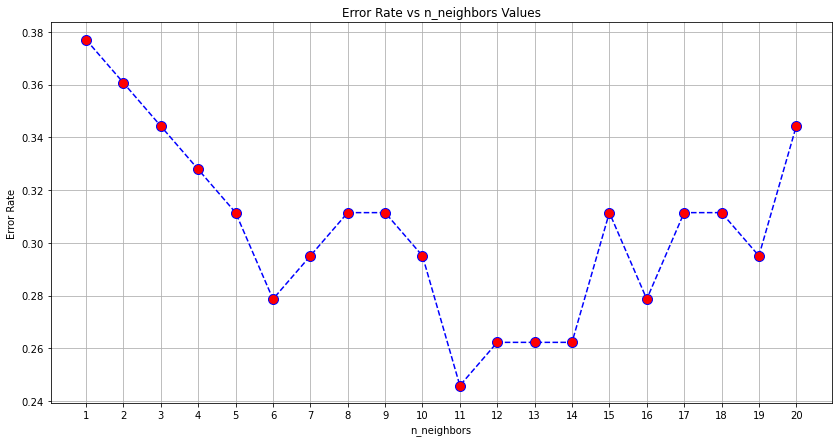

In [36]:
plt.figure(figsize=(14,7))
plt.plot(range(1,21), error_rate, color="blue", linestyle="--", marker="o", markerfacecolor="red", markersize=10)
plt.xticks(np.arange(1, 21, 1))
plt.title("Error Rate vs n_neighbors Values")
plt.xlabel("n_neighbors")
plt.grid()
plt.ylabel("Error Rate");

print(f"Maximum KNN score on test data: {max(test_scores)*100:.2f}%")
print(f"Best n_neighbors value: {error_rate.index(min(error_rate)) + 1}")
print(f"Minimum error rate: {min(error_rate):.4f}")

Maximum KNN score on test data: 75.41%


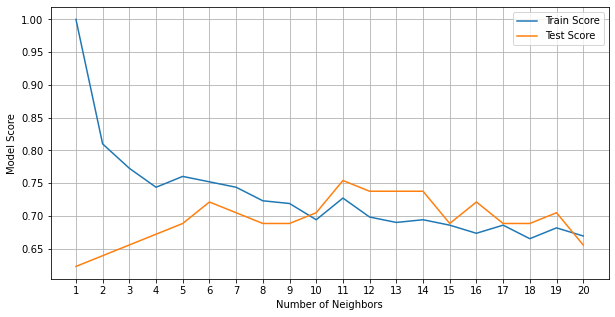

In [37]:
plt.figure(figsize=(10, 5))
plt.plot(neighbors, train_score, label="Train Score")
plt.plot(neighbors, test_scores, label="Test Score")
plt.xticks(np.arange(1, 21, 1))
plt.grid()
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Score")
plt.legend();

print(f"Maximum KNN score on test data: {max(test_scores)*100:.2f}%")

### Hyperparameter Tuning (RandomizedSearchCV)
We're going to tune:
> * LogisticRegression()
>* RandomForestClassifier()

... using RandomizedSearchCV

In [38]:
# Hyperparameter grid for LogisticRegression()
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Hyperparameter grid for RandomForestClassifier()
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

##### Let's tune Logistic Regression

In [39]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression()
rs_log_reg = RandomizedSearchCV(estimator=LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression()
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.1s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [40]:
# Best hyperparameters for the randomized search LogisticRegression model
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [41]:
# Evaluate the randomized search LogisticRegression model
rs_log_reg.score(X_test, y_test)

0.8852459016393442

##### Let's tune Random Forest Classifier

In [42]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier()
rs_rf = RandomizedSearchCV(estimator=RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.4min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [43]:
# Best hyperparameters for the randomized search RandomForestClassifier model
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [44]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test)

0.8688524590163934

### Hyperparameter Tuning (GridSearchCV)

Since our LogisticRegression model provides the best scores so far, we'll try and improve them again using GridSearchCV...

##### Tune Logistic Regression

In [45]:
# Hyperparameter grid for LogisticRegression()
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(estimator=LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.6s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [46]:
# Best hyperparameters for the grid search LogisticRegression model
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [47]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test, y_test)

0.8852459016393442

### Evaluating tuned machine learning classifier, beyond accuracy

> * ROC curve and AUC score
>* Confusion matrix
>* Classification report
>* Precision
>* Recall
>* F1-score

In [48]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

In [49]:
# Predicted labels
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [50]:
# Actual labels
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

##### ROC curve and AUC score

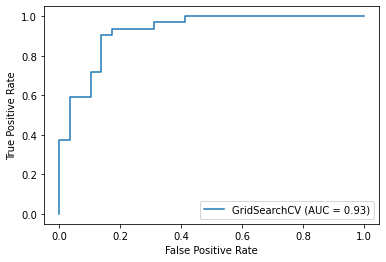

In [51]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(estimator=gs_log_reg,
               X=X_test,
               y=y_test)

##### Confusion matrix

In [52]:
print(confusion_matrix(y_true=y_test, 
                       y_pred=y_preds))

[[25  4]
 [ 3 29]]


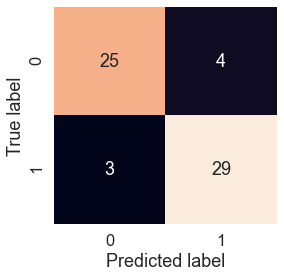

In [53]:
sns.set(font_scale=1.5)

def plot_confusion_matrix(y_true, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(4, 4))
    ax = sns.heatmap(confusion_matrix(y_true, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")

plot_confusion_matrix(y_test, y_preds)

##### Classification report as well as accuracy, precision, recall and f1-score.

In [54]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metics using cross-validation

We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using `'cross_val_score()'`.

In [55]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [56]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418,
                         solver='liblinear')

##### Cross-validated accuracy

In [57]:
cv_acc = cross_val_score(estimator=clf, 
                         X=X,
                         y=y,
                         cv=5,
                         scoring="accuracy")

cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

##### Cross-validated precision

In [58]:
cv_precision = cross_val_score(estimator=clf,
                         X=X,
                         y=y,
                         cv=5,
                         scoring="precision")

cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

##### Cross-validated recall

In [59]:
cv_recall = cross_val_score(estimator=clf,
                         X=X,
                         y=y,
                         cv=5,
                         scoring="recall")

cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

##### Cross-validated f1-score

In [60]:
cv_f1 = cross_val_score(estimator=clf,
                         X=X,
                         y=y,
                         cv=5,
                         scoring="f1")

cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

##### Visualize cross-validate metrics

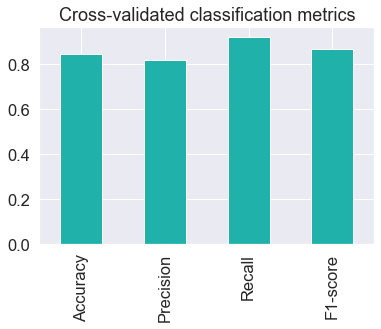

In [61]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1-score": cv_f1},
                          index=[0])

cv_metrics.T.plot(kind="bar", legend=False, color="lightseagreen")
plt.title("Cross-validated classification metrics");

## 🗿Feature Importance

Feature importance is another way of asking, "which features contributed most to the outcomes of the model and how did they contribute?"

##### Let's find the feature importance for our Logistic Regression model

In [62]:
# Best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [63]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.20433597178569418,
                         solver='liblinear')

clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [64]:
# Check coef_
clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [65]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [66]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

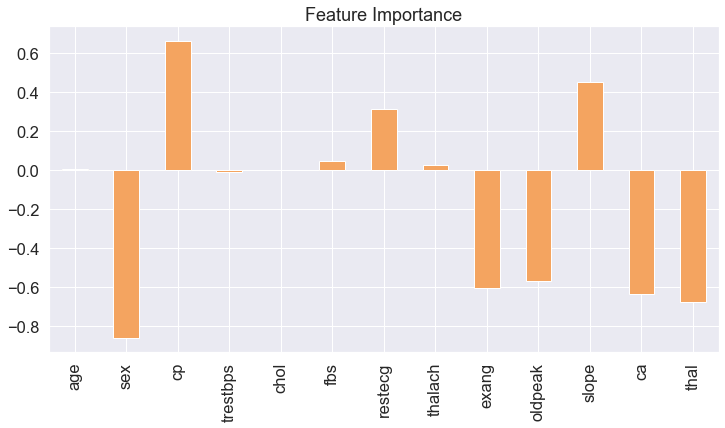

In [67]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False, color="sandybrown", figsize=(12, 6));

##### Feature importance of "sex" with "target":

>* sex: (1 = male), (0 = female)
>* target: (1 = disease), (0 = no disease)

In [68]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


##### Feature importance of "cp" with "target":
cp - chest pain type
>* 0: Typical angina: chest pain related decrease blood supply to the heart
>* 1: Atypical angina: chest pain not related to heart
>* 2: Non-anginal pain: typically esophageal spasms (non heart related)
>* 3: Asymptomatic: chest pain not showing signs of disease

In [69]:
pd.crosstab(df["cp"], df["target"])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


##### Feature importance of "slope" with "target":
slope - the slope of the peak exercise ST segment
>* 0: Upsloping: better heart rate with excercise (uncommon)
>* 1: Flatsloping: minimal change (typical healthy heart)
>* 2: Downslopins: signs of unhealthy heart

In [70]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


## 💾Exporting Model

Exporting the LogisticRegression() model with the help of `"joblib"`

In [71]:
from joblib import dump, load

# Save model to file
dump(value=clf,
     filename="model/logistic_regression_model.joblib")

['model/logistic_regression_model.joblib']

In [72]:
# Load the model
loaded_model = load(filename="model/logistic_regression_model.joblib")

loaded_model.score(X_test, y_test)

0.8852459016393442